## Árvores de Regressão

Alguns algoritmos de classificação podem ser utilizados como algoritmos de regressão, inclusive árvores de decisão!
 As **árvores de regressão** consistem em funções com valores discretos, similar a uma escada, onde cada degrau é o valor de uma folha. [Aqui](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) há detalhes sobre a classe do sklearn.

Considere o seguinte dataset:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/800a4332-e709-4ea3-8c24-959c05c8fd65.png' width=500>

O algoritmo irá obter os valores do target como sendo **a média dos valores de cada folha da árvore final**.

Visualmente:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/64cb4edd-20e1-486a-8fc9-60e60e1485d5.png' width=500>

Para a escolha das melhores divisões:

- o algoritmo percorre a médida entre cada par de pontos das features;
- define estes valores como divisões (sequencialmente);
- para cada divisão experimentada, o algoritmo calcula o MSE;
- a melhor divisão é aquela que apresentar o menor erro!

Visualmente:

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/be58ac8b-5c59-4b9f-be79-e000d060e9e3.png' width=500>

<img src='https://s3-sa-east-1.amazonaws.com/lcpi/1f317afd-6119-41a5-849d-cee038403cf2.png' width=500>

Outro exemplo de árvore de regressão treinada:

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--YryIJN_o--/c_imagga_scale,f_auto,fl_progressive,h_900,q_auto,w_1600/https://thepracticaldev.s3.amazonaws.com/i/7oxf0e3cggdj9jayxeig.png" width=600>

### Exemplo Regressão

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
cars = pd.read_csv('Car_Prices.csv')
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,88.6,168.8,64.1,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,88.6,168.8,64.1,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,94.5,171.2,65.5,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,99.8,176.6,66.2,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,99.4,176.6,66.4,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,109.1,188.8,68.9,...,four,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,109.1,188.8,68.8,...,four,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,109.1,188.8,68.9,...,six,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,109.1,188.8,68.9,...,six,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
cars.columns.tolist()

['car_ID',
 'symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

<Axes: ylabel='Frequency'>

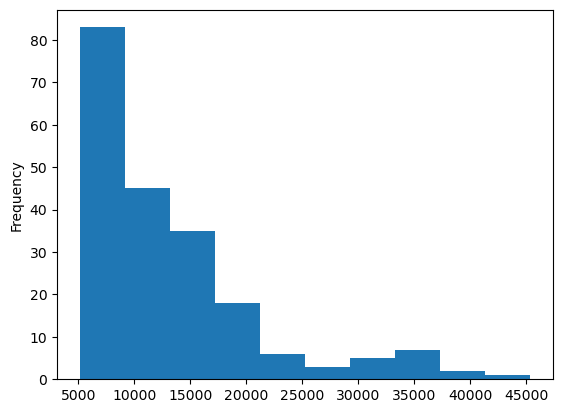

In [6]:
cars['price'].plot(kind='hist')

In [7]:
cars['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [8]:
cars['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [9]:
cars['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [10]:
cars['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [11]:
cars['enginesize'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [13]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
cars['doornumber'].value_counts(normalize=True)

four    0.560976
two     0.439024
Name: doornumber, dtype: float64

In [15]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,88.6,168.8,64.1,...,four,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,88.6,168.8,64.1,...,four,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,94.5,171.2,65.5,...,six,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,99.8,176.6,66.2,...,four,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,99.4,176.6,66.4,...,five,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
cars['CarName'].nunique()

147

In [20]:
cars["brand"] = cars["CarName"].apply(lambda name: name.split()[0])
cars["brand"]

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: brand, Length: 205, dtype: object

In [21]:
cars["brand"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [22]:
cars["brand"].nunique()

28

In [23]:
alfa_romeo =  cars["brand"] == "alfa-romero"
mazda      =  cars["brand"] == "maxda"
nissan     =  cars["brand"] == "Nissan"
porsche    =  cars["brand"] == "porcshce"
toyota     =  cars["brand"] == "toyouta"
volkswagen = (cars["brand"] == "vokswagen") | (cars["brand"] == "vw")


cars.loc[cars[alfa_romeo].index, "brand"] = "alfa-romeo"
cars.loc[cars[mazda].index, "brand"]      = "mazda"
cars.loc[cars[nissan].index, "brand"]     = "nissan"
cars.loc[cars[porsche].index, "brand"]    = "porsche"
cars.loc[cars[toyota].index, "brand"]     = "toyota"
cars.loc[cars[volkswagen].index, "brand"] = "volkswagen"

cars['brand'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
var['a','b','c']
a =  0   0   1
b =  0   1   0
c =  1   0   0

In [25]:
cars_with_dummies = pd.get_dummies(
    cars, 
    columns=['fueltype',
            'aspiration',
            'doornumber',
            'cylindernumber',
            'carbody',
            'brand']
)

cars_with_dummies

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),109.1,188.8,68.9,55.5,2952,141,3.78,...,0,0,0,0,0,0,0,0,0,1
201,202,-1,volvo 144ea,109.1,188.8,68.8,55.5,3049,141,3.78,...,0,0,0,0,0,0,0,0,0,1
202,203,-1,volvo 244dl,109.1,188.8,68.9,55.5,3012,173,3.58,...,0,0,0,0,0,0,0,0,0,1
203,204,-1,volvo 246,109.1,188.8,68.9,55.5,3217,145,3.01,...,0,0,0,0,0,0,0,0,0,1


In [28]:
cars_with_dummies.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
wheelbase,88.6,88.6,94.5,99.8,99.4
carlength,168.8,168.8,171.2,176.6,176.6
carwidth,64.1,64.1,65.5,66.2,66.4
carheight,48.8,48.8,52.4,54.3,54.3
curbweight,2548,2548,2823,2337,2824
enginesize,130,130,152,109,136
boreratio,3.47,3.47,2.68,3.19,3.19


In [29]:
cars_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   CarName                205 non-null    object 
 3   wheelbase              205 non-null    float64
 4   carlength              205 non-null    float64
 5   carwidth               205 non-null    float64
 6   carheight              205 non-null    float64
 7   curbweight             205 non-null    int64  
 8   enginesize             205 non-null    int64  
 9   boreratio              205 non-null    float64
 10  stroke                 205 non-null    float64
 11  compressionratio       205 non-null    float64
 12  horsepower             205 non-null    int64  
 13  peakrpm                205 non-null    int64  
 14  citympg                205 non-null    int64  
 15  highwa

### Divisão de treino e teste

In [30]:
X = cars_with_dummies.drop(columns = ['car_ID', 'CarName','price'])
y = cars_with_dummies['price']

In [31]:
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,0,0,1
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,0,0,1
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,0,0,1
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [58]:
model = DecisionTreeRegressor(random_state=10)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [59]:
y_pred = model.predict(X_test)
y_pred

array([12290., 18280., 13845., 13645., 30760., 10245.,  5499., 17669.,
        9258., 16845., 10245.,  9988.,  7995., 12440., 32528., 15750.,
       11245., 16900., 13495., 12629.,  7295., 16925.,  9639., 15998.,
       16845., 18150.,  9549.,  6095., 10295., 15750.,  6669.,  8495.,
        6095., 13495., 40960., 25552., 17669., 15750.,  8921.,  6095.,
        9988.,  6938.,  6692., 32528., 35550.,  6095., 14489., 12440.,
       13645., 12964.,  9279., 16515., 16845.,  6692., 13645., 25552.,
       11245.,  7975., 16845., 25552., 12290.,  6229.])

In [60]:
r2 = r2_score(y_test, y_pred)
r2

0.8545077330663536

In [61]:
mse = mean_squared_error(y_test, y_pred)
mse

9235811.713709677

In [62]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae

2201.0564516129034

<Axes: >

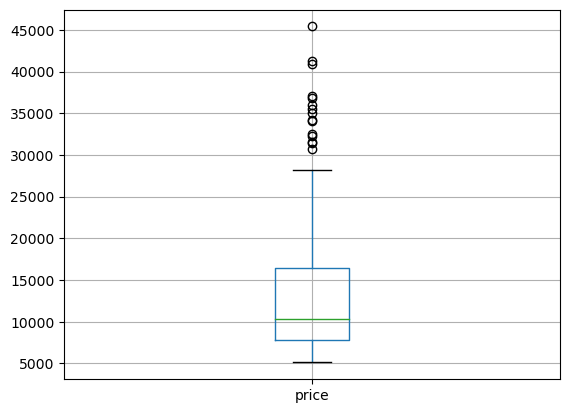

In [45]:
cars[['price']].boxplot()

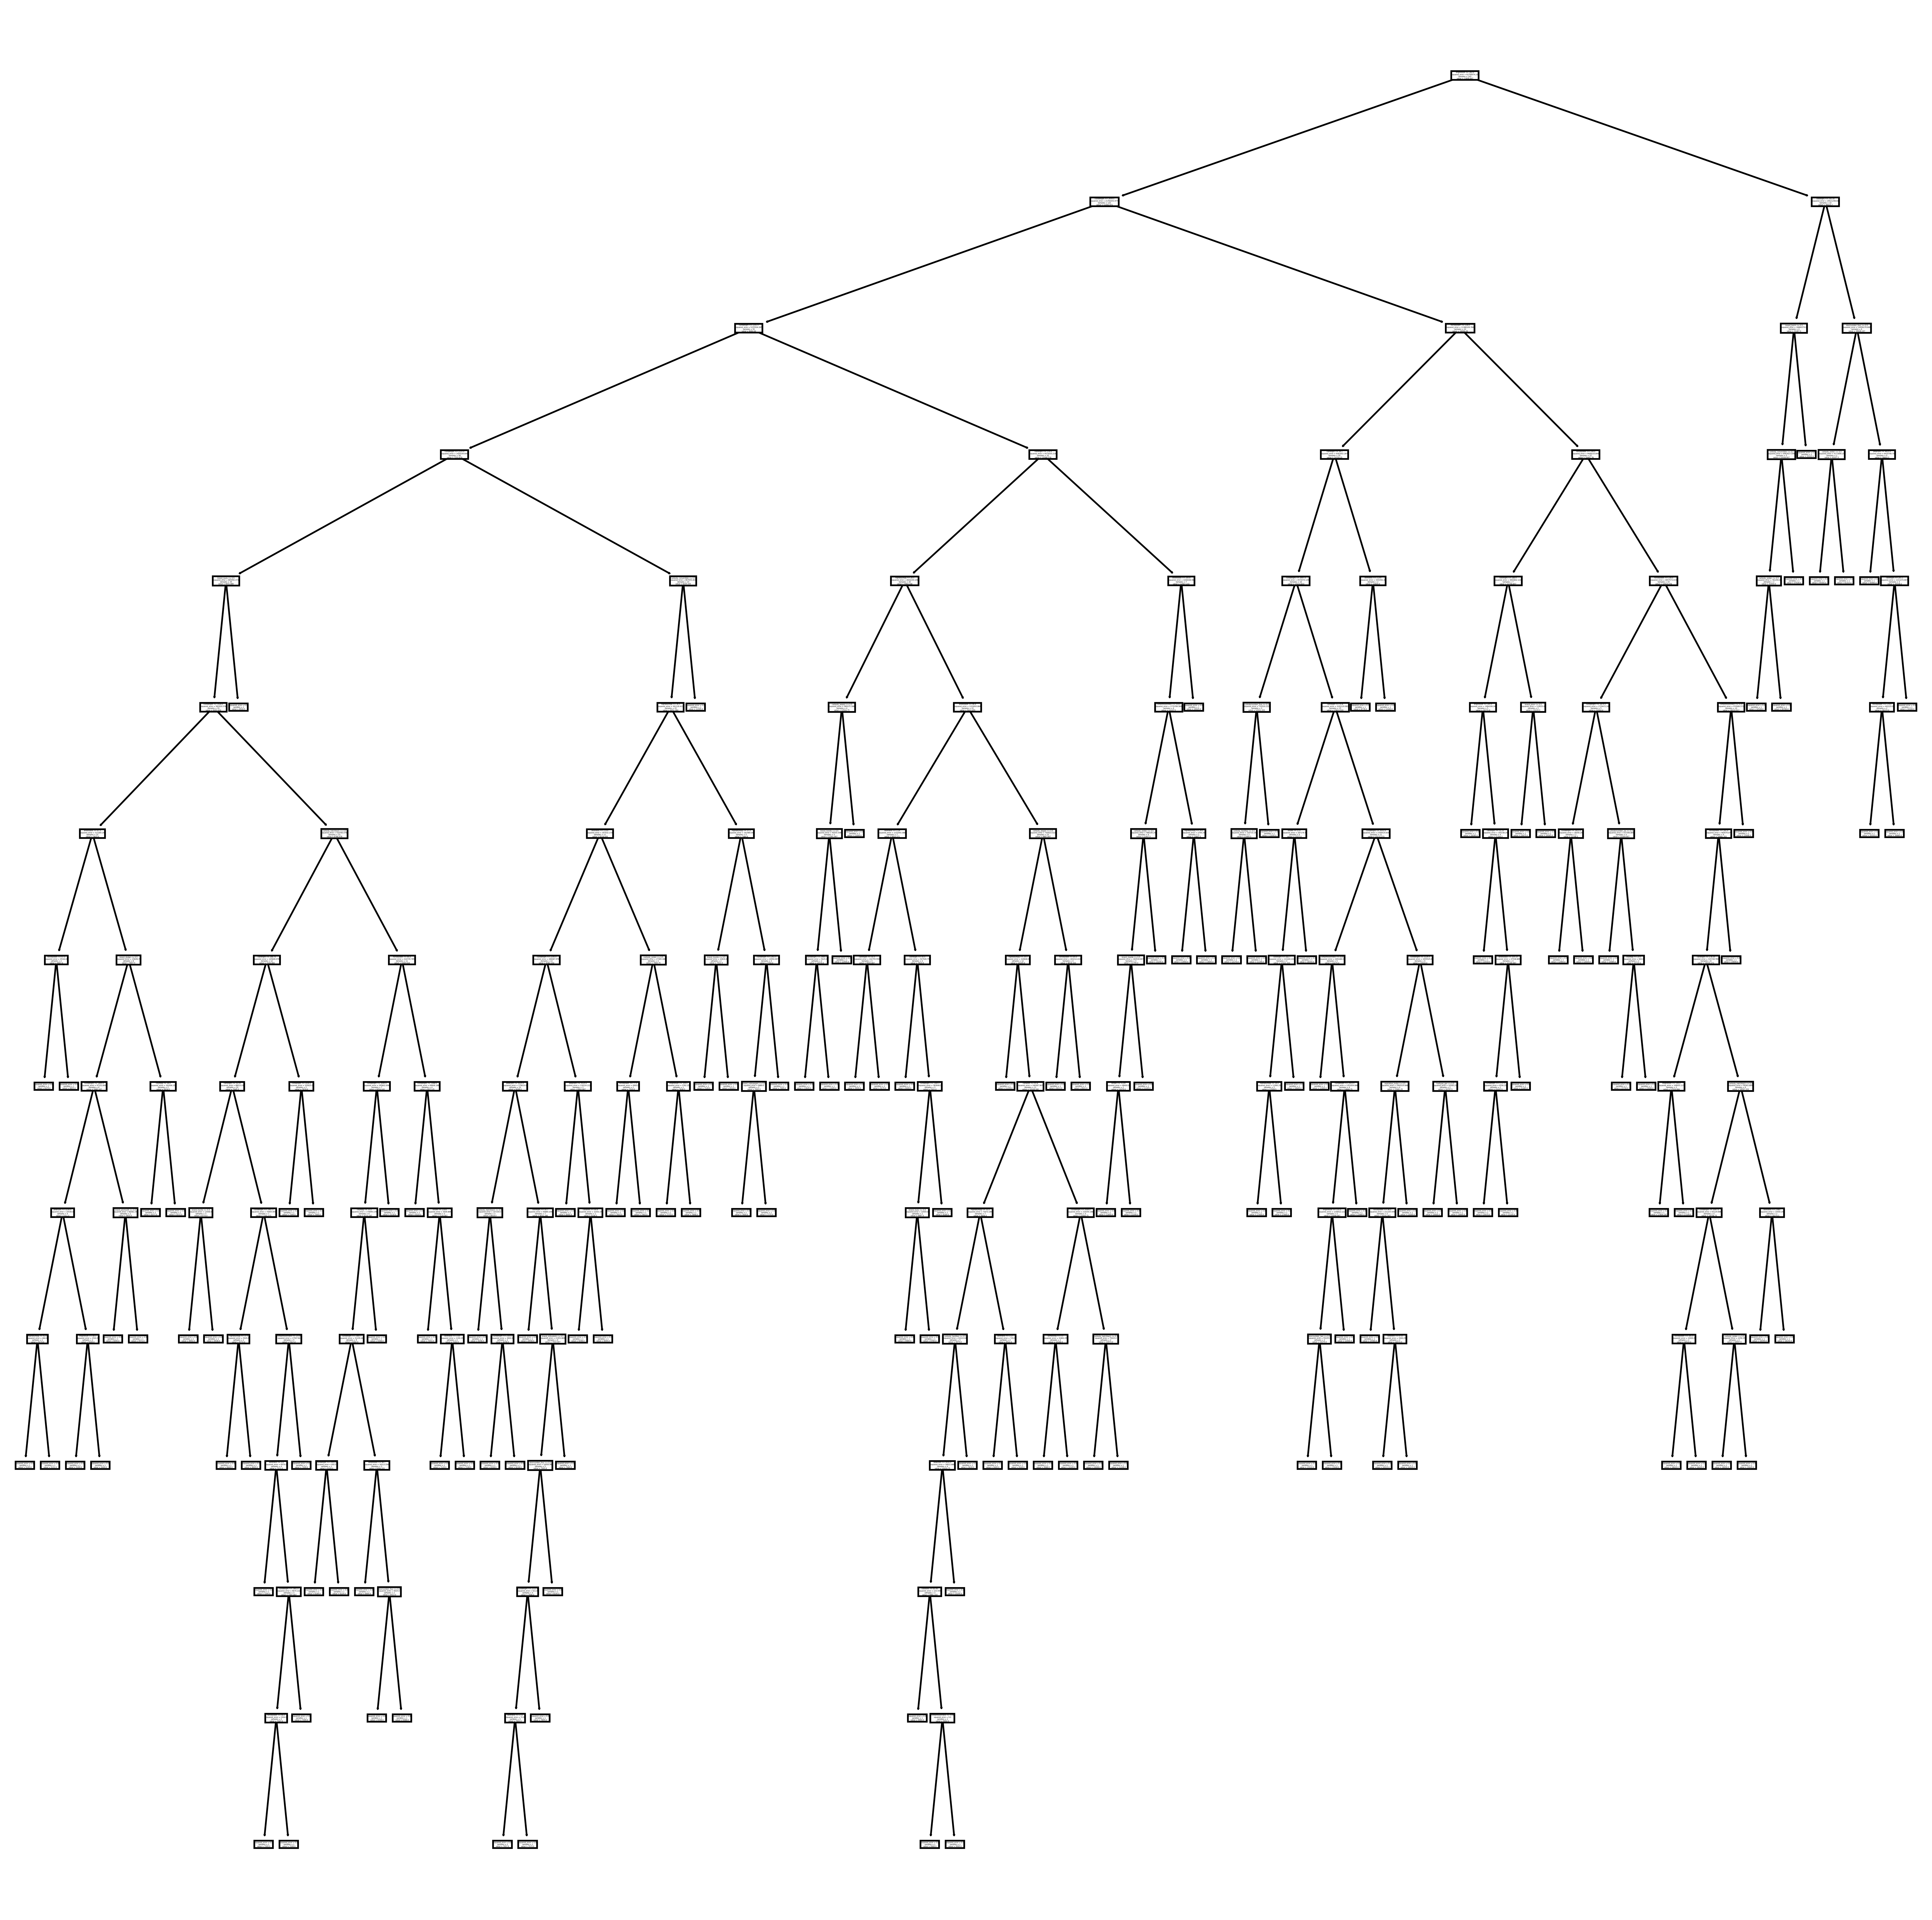

In [66]:
from sklearn import tree
plt.figure(figsize=(20,20), dpi=450)

tree.plot_tree(model, feature_names=X_train.columns.tolist())
plt.show()

In [67]:
model.feature_importances_

array([7.09595632e-06, 3.45304705e-03, 2.31780350e-02, 1.51579563e-04,
       6.41982083e-03, 2.53760329e-01, 6.46089117e-01, 1.59909300e-03,
       9.90296496e-05, 2.33085775e-03, 3.48508693e-02, 2.58864141e-03,
       1.35607616e-04, 5.15917431e-03, 0.00000000e+00, 2.33981879e-06,
       0.00000000e+00, 7.72661010e-04, 6.21040655e-03, 1.22990118e-05,
       0.00000000e+00, 1.92546087e-04, 0.00000000e+00, 1.12493996e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.48941808e-03,
       6.82647991e-05, 4.89460500e-04, 1.31453266e-03, 9.05067044e-04,
       0.00000000e+00, 0.00000000e+00, 2.65077388e-05, 5.19460742e-03,
       0.00000000e+00, 3.99949684e-05, 2.89983490e-05, 1.23517878e-03,
       0.00000000e+00, 5.05267233e-05, 0.00000000e+00, 8.73441779e-06,
       0.00000000e+00, 0.00000000e+00, 1.52292277e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.90125445e-06,
       1.53423073e-06, 0.00000000e+00])

In [68]:
model.feature_names_in_

array(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_diesel', 'fueltype_gas', 'aspiration_std',
       'aspiration_turbo', 'doornumber_four', 'doornumber_two',
       'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'brand_alfa-romeo', 'brand_audi', 'brand_bmw', 'brand_buick',
       'brand_chevrolet', 'brand_dodge', 'brand_honda', 'brand_isuzu',
       'brand_jaguar', 'brand_mazda', 'brand_mercury', 'brand_mitsubishi',
       'brand_nissan', 'brand_peugeot', 'brand_plymouth', 'brand_porsche',
       'brand_renault', 'brand_saab', 'brand_subaru', 'brand_toyota',
       'brand_v

In [75]:
df_importance = pd.DataFrame(data = [model.feature_importances_], columns = model.feature_names_in_).T
df_importance.sort_values(by=0, ascending=False)

,0
enginesize,0.646089
curbweight,0.253760
horsepower,0.034851
carlength,0.023178
carheight,0.006420
doornumber_four,0.006210
brand_buick,0.005195
highwaympg,0.005159
carbody_convertible,0.003489
wheelbase,0.003453


## Exercícios
__1)__ Use os dados imobiliários do Sklearn para classificar os quartis.

Para pegar os dados, use:



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [30]:
X = pd.DataFrame(data = data['data'], columns = data['feature_names'])
y = pd.Series(data = data['target'], name='price')

In [8]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [9]:
import seaborn as sns
subset = X[['Latitude','Longitude','MedInc']]
subset

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462
...,...,...,...
20635,39.48,-121.09,1.5603
20636,39.49,-121.21,2.5568
20637,39.43,-121.22,1.7000
20638,39.43,-121.32,1.8672


<Axes: xlabel='Latitude', ylabel='Longitude'>

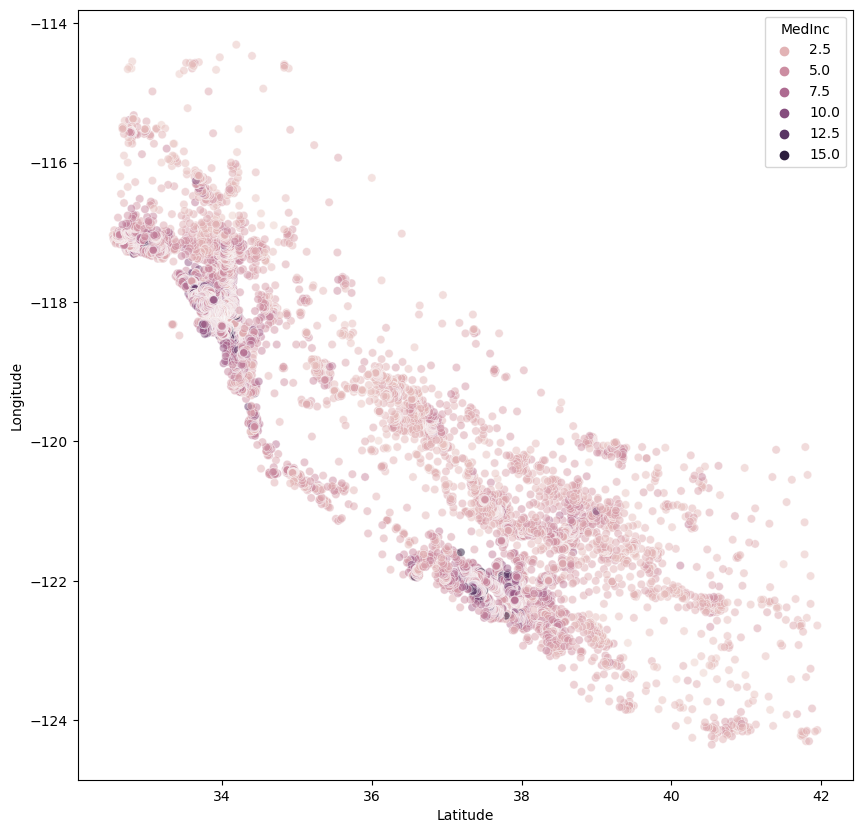

In [14]:
f, ax = plt.subplots(figsize=(10, 10))

sns.scatterplot(
    x='Latitude',
    y='Longitude',
    hue='MedInc',
    data=subset,
    alpha=0.5
)

### Discretização de label (Solução 1)

In [15]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [36]:
quantiles = y.quantile([.25, .5, .75]).to_list()
quantiles

[1.196, 1.797, 2.6472499999999997]

In [37]:
quantiles = [0] + quantiles + [float('inf')]
quantiles

[0, 1.196, 1.797, 2.6472499999999997, inf]

In [38]:
y_quant = pd.cut(y, bins=quantiles, labels=[0, 1, 2, 3])
y_quant

0        3
1        3
2        3
3        3
4        3
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: price, Length: 20640, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [39]:
y_quant.value_counts(normalize=True)

0    0.250097
1    0.250048
3    0.250000
2    0.249855
Name: price, dtype: float64

### Discretização de label (Solução 2)

In [23]:
def quantile_classification(value):
    if value <= y.quantile(.25): return 0
    elif value <= y.quantile(.5): return 1
    elif value <= y.quantile(.75): return 2
    else: return 3

y = pd.DataFrame(y.apply(quantile_classification))
y

,price
0,3
1,3
2,3
3,3
4,3
...,...
20635,0
20636,0
20637,0
20638,0


### Discretização de label (Solução 3)

In [26]:
y=y.apply(lambda x:1 if x<=1.19 else( 2 if x <=1.79  else  ( 3 if x <= 2.64 else 4 )))

In [27]:
y

0        4
1        4
2        4
3        4
4        4
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: price, Length: 20640, dtype: int64

### Discretização de label (Solução 3)

In [29]:
y = pd.qcut(y, 4, labels=False) + 1
y

0        4
1        4
2        4
3        4
4        4
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: price, Length: 20640, dtype: int64

### Divisão de treino e teste

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_quant, test_size=0.3, random_state=10)

### Modelo

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=10)

### Treinamento do modelo

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

### Avaliação do modelo

In [43]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.6606912144702842

In [45]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1213,  284,   50,   17],
       [ 284,  859,  333,   86],
       [  45,  297,  886,  261],
       [  27,   76,  341, 1133]], dtype=int64)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

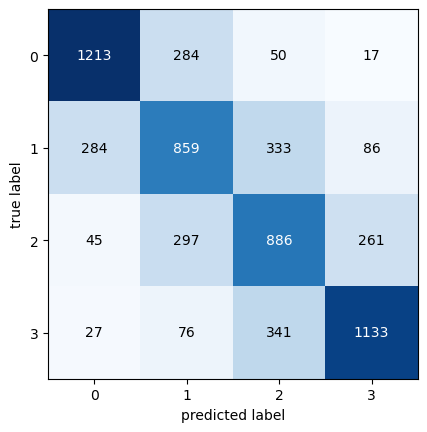

In [44]:
plot_confusion_matrix(conf_mat=matrix)

### Interpretação do modelo

In [53]:
model.get_depth()

27

In [58]:
#from sklearn import tree
#
#tree.plot_tree(model, feature_names=X_train.columns.tolist())
#plt.plot()

### Modelo 2

In [51]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(
            random_state=10,
            max_depth=3
        )

model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [52]:
from sklearn.metrics import accuracy_score

y_pred = model2.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.537952196382429

### Model 03 - Regressão Logística (Sem normalização)

In [74]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression(max_iter=10_000)

model3.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [75]:
y_pred = model3.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.5762273901808785

### Modelo 4  - Regressão Logística (Com normalização)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
17853,5.3994,23.0,5.019157,1.022989,910.0,3.486590,37.44,-121.88
15963,3.9567,52.0,5.173664,1.127863,1848.0,3.526718,37.71,-122.44
20106,3.0500,17.0,5.383764,1.095941,753.0,2.778598,37.94,-120.29
15525,2.2500,16.0,4.331113,1.109420,2737.0,2.604186,33.14,-117.05
5234,2.0187,39.0,4.876068,1.102564,1313.0,5.611111,33.94,-118.23
...,...,...,...,...,...,...,...,...
9372,4.1250,37.0,5.109792,1.044510,648.0,1.922849,37.93,-122.53
7291,1.2059,18.0,2.537037,1.089744,1913.0,2.725071,33.98,-118.22
17728,5.5336,6.0,4.905336,0.965577,2160.0,3.717728,37.32,-121.79
7293,2.2059,35.0,2.748491,0.997988,2160.0,4.346076,33.98,-118.23


In [67]:
scaler.fit_transform(X_train)

array([[ 0.81227025, -0.44350528, -0.16664269, ...,  0.06494541,
         0.83999711, -1.14723656],
       [ 0.04888899,  1.85414996, -0.1036322 , ...,  0.0707951 ,
         0.96603327, -1.42642929],
       [-0.43087659, -0.91888223, -0.0179501 , ..., -0.03826408,
         1.0733974 , -0.35452862],
       ...,
       [ 0.88328   , -1.79040663, -0.21306094, ...,  0.09864017,
         0.78398104, -1.1023663 ],
       [-0.87751839,  0.50724861, -1.09265745, ...,  0.19023936,
        -0.7751329 ,  0.6725018 ],
       [-0.62861387, -0.99811172, -0.60143478, ..., -0.08497825,
         0.77464503, -1.14723656]])

In [68]:
X_train_std = scaler.fit_transform(X_train)

In [76]:
from sklearn.linear_model import LogisticRegression

model4 = LogisticRegression(max_iter=10_000)

model4.fit(X_train_std, y_train)

LogisticRegression(max_iter=10000)

In [70]:
X_test_std = scaler.transform(X_test)

In [77]:
y_pred = model4.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
acc

0.6133720930232558

### Model 05

In [83]:
from sklearn.linear_model import LogisticRegression

model5 = LogisticRegression(
            multi_class='multinomial', 
            solver='lbfgs', 
            max_iter=10_000
         )

model5.fit(X_train_std, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [84]:
y_pred = model5.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
acc

0.6133720930232558

## REGRESSÃO

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Pre-processing

In [111]:
df['sex'] = np.where(df['sex']=='male', 1, 0)
df['smoker'] = np.where(df['smoker']=='yes', 1, 0)

In [112]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [113]:
df[['region']]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [114]:
from sklearn.preprocessing import OneHotEncoder

one_hot_enconder = OneHotEncoder()

feature_arr = one_hot_enconder.fit_transform(df[['region']]).toarray()
feature_arr

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [115]:
one_hot_enconder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [116]:
df_feature_arr = pd.DataFrame(data = feature_arr, columns = one_hot_enconder.categories_)
df_feature_arr

,northeast,northwest,southeast,southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [117]:
df_features = pd.concat([df, df_feature_arr], axis=1)
df_features.columns = ['age',
                       'sex',
                       'bmi',
                       'children',
                       'smoker',
                       'region',
                       'charges',
                       'northeast',
                       'northwest',
                       'southeast',
                       'southwest']
df_features

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [118]:
df_features.drop(columns='region', inplace=True)

In [119]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int32  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int32  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   float64
 7   northwest  1338 non-null   float64
 8   southeast  1338 non-null   float64
 9   southwest  1338 non-null   float64
dtypes: float64(6), int32(2), int64(2)
memory usage: 94.2 KB


### Modelo 1

In [120]:
from sklearn.model_selection import train_test_split

X = df_features.drop(columns='charges')
y = df_features['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=10)

In [121]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor(random_state=10)

model1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=10)

In [122]:
y_pred = model1.predict(X_test)

In [126]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def regression_report(y_test, y_pred):
    metrics = {
        'R2_SCORE': np.round(r2_score(y_test, y_pred), 3),
        'MAE'     : np.round(mean_absolute_error(y_test, y_pred), 3),
        'MAPE'    : np.round(mean_absolute_percentage_error(y_test, y_pred), 3),
        'MSE'     : np.round(mean_squared_error(y_test, y_pred), 3)
    }
    
    print('REPORT DE MÉTRICAS DE REGRESSÃO')
    print('R2_SCORE:', metrics['R2_SCORE'])
    print('MAE:'     , metrics['MAE'])
    print('MAPE:'    , metrics['MAPE'])
    print('MSE'     , metrics['MSE'])
    
regression_report(y_test, y_pred)    

REPORT DE MÉTRICAS DE REGRESSÃO
R2_SCORE: 0.681
MAE: 3056.672
MAPE: 0.321
MSE: 41389162.925
